# **Kaggle Machine Learning Project - TB12 Sucks Ass Edition**

This Machine Learning Project can be found on Kaggle at: https://www.kaggle.com/c/titanic <br>
Our goal is to become comfortable with reading & preparing unclean data utilizing Python and with this data find the best Predictive Algorithm on who will survive the ship sinking.


## **Reading & Exploring Our Data** 

The first step of this project is to read in and explore our data. We will be pointing out trends that we notice, as this will be important for when we prepare the data. 

### <u>Import Libraries

In [1]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('Desktop/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Linerar Algebra
import numpy as np 

# Data Structure
import pandas as pd 

# Data Visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Machine Learning Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

### <u>Setting Testing/Training Data


We first want to convert our Testing and Training datasets into Pandas Dataframes. When we utilize this Dataframe, we will be able to run Pandas Operations on these tables.

In [2]:
#Import Testing Data
filename = 'test.csv'
test_data = pd.read_csv(r"C:\Users\krstob\Desktop\Kaggle-Titanic-ML-Project\Kris\Titanic_Datasets\test.csv")
print('Loaded data file {0} with {1} rows'.format(filename, len(test_data)))

#Import Training Data
filename = 'train.csv'
train_data = pd.read_csv(r"C:\Users\krstob\Desktop\Kaggle-Titanic-ML-Project\Kris\Titanic_Datasets\train.csv")
print('Loaded data file {0} with {1} rows'.format(filename, len(train_data)))

Loaded data file test.csv with 418 rows
Loaded data file train.csv with 891 rows


### <u>Data Exploration - Basic/Missing Data

Let's first explore our training set of data. I would like to see our different variables, the type (char/num), as well as the overall trends. <br>
After this, I will graph the percentage of survived to particular variables to know what to dive into for our ML Models. 

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


By running the Pandas Describe summary, we can see that the mean (average) survived is apprixmately 38%. 

In [5]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


By looking at our training data, we can notice a few important things:
1. There are missing values that we will need to take care of (NaN)
2. There are a few variables that will need to be converted to Numeric (Sex, Ticket)
3. There are some features that have wide ranges, so we wil need to convert them into a similar scale

**Let's first look into the missing values**. I am curious to see what variables have a specific percentage of their rows missing. 

In [6]:
#We need to check how many Values are Null using the isnull() function
total_missing = train_data.isnull().sum().sort_values(ascending=False)
total_missing.head(5)

#Find the total values there
total = train_data.notnull().sum().sort_values(ascending=False)
total.head(5)

#Find the percent of missing values per variable
Percent = train_data.isnull().sum()/train_data.isnull().count()*100
Percent.sort_values(ascending=False).head(5)

#Round these to one decimal place for less storage
Percent_Rounded = (round(Percent,1)).sort_values(ascending=False)

#Plot the Missing Data [Total Missing, Percentage Missing] With a Concatination of two Columns
Missing_Data = pd.concat([total, total_missing, Percent_Rounded], axis = 1, keys=['Non Missing Values', 'Total Missing Values', '% Missing'], sort=True)
Missing_Data



,Non Missing Values,Total Missing Values,% Missing
Age,714,177,19.9
Cabin,204,687,77.1
Embarked,889,2,0.2
Fare,891,0,0.0
Name,891,0,0.0
Parch,891,0,0.0
PassengerId,891,0,0.0
Pclass,891,0,0.0
Sex,891,0,0.0
SibSp,891,0,0.0


**What Does This Tell Us?:** The Embarked only has two missing values. Age has about 20% missing, and, the Cabin has 77% missing which is a large amount. 

### <u>Data Exploration: Features

I now want to explore what features would contribute to a high survival rate (*or likewise a low survival rate*). <br>
We have the following variables to look into:
1. Age
2. Cabin
3. Embarked 
4. Fare
5. Parch
6. Pclass
7. Sex
8. SibSp
9. Survived
10. Ticket

I do not believe that Ticket, Name, and PassengerId will be correlated with an affect on survival rate, but this will be taken into consideration for performance boosts.

 <br>**Let's First Look into Age & Sex:**

I would like to plot Age vs Sex to see if there are any survival correlations

Text(0.5, 1.0, 'Men')

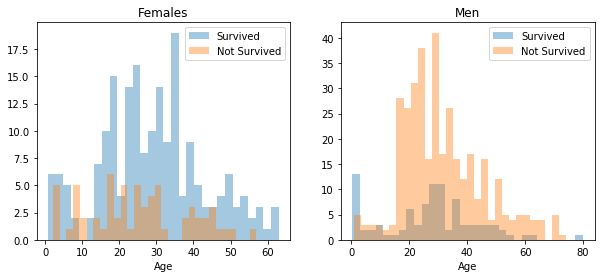

In [7]:
#Create a Blank Graph Canvas, 2 Graphs (Female/Male)
Survived = 'Survived'
Not_Survived = 'Not Survived'
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

#Set Women/Male Variable to it's value in the Training Dataset
Women = train_data[train_data['Sex'] == 'female']
Male = train_data[train_data['Sex'] == 'male']

#For the First Graph, plot the Ammount of Women who Survived Dependent on their Age
ax = sns.distplot(Women[Women['Survived']==1].Age.dropna(), bins=30, label = Survived, ax = axes[0], kde = False)

#For the First Graph, layer the Ammount of Women who did not Survive Dependent on their Age
ax = sns.distplot(Women[Women['Survived']==0].Age.dropna(), bins=30, label = Not_Survived, ax = axes[0], kde = False)

#Display a Legend for the First Graph
ax.legend()
ax.set_title('Females')

#For the Second Graph, plot the Ammount of Men who Survived Dependent on their Age
ax = sns.distplot(Male[Male['Survived']==1].Age.dropna(), bins=30, label = Survived, ax = axes[1], kde = False)

#For the Second Graph, layer the Ammount of Men who did not Survive Dependent on their Age
ax = sns.distplot(Male[Male['Survived']==0].Age.dropna(), bins=30, label = Not_Survived, ax = axes[1], kde = False)

#Display a Legend for the Second Graph
ax.legend()
ax.set_title('Men')

What does this graph show us?
1. Females Between the Ages of ~18-35 had a higher chance of survival
2. Males between 20-32 had a higher chance of survival
3. Female babies/kids betwen 1 - 8 years also had a decent survival rate <br>

<br>**Let's Now Look at Embarked, PClass, & Sex**

To analyze the relationship between Embarked, Pclass, Sex, and Survived, we will use Seaborn's FacetGrid. Facetgrid is a multi-plot grid for conditional relationships: (In our case, Embarked = S, C & Q)
<br>
<br>The documentation for FacetGrid: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

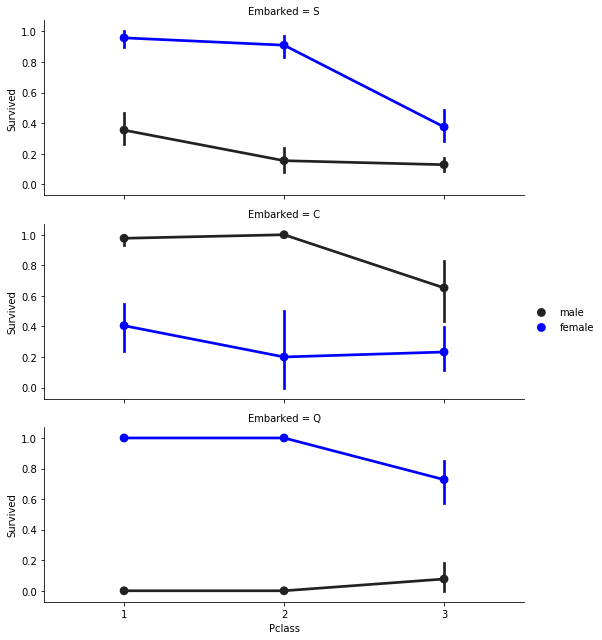

In [8]:
#Creating a FacetGrid Empy 1 x 3 Plot so we can overlay our data
#It creates three rows, as Embarked as 3 different options in the dataset
FacetGrid = sns.FacetGrid(train_data, row = 'Embarked', height = 3, aspect = 2.5)

#Placing a Point Plot on our Facet Grid. Pclass is our X Axis, Survived is the Y Axis, and Sex is the two different lines
#.Map is applything the plotting function to each facet's subset of data
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = None, order = None, hue_order = None, style = 'ticks', color='b')

#Adding a Legend for Readability
FacetGrid.add_legend()


What does this graph show us?
1. Men have a high survival percentage on Port C, but very low on Port Q and quite low on Port S
2. Women havae a very high Survival Percentage on Port Q, and high percentage on Port S
3. Women Have a low survival perventage on Port C

<br>**Let's Take a Deeper Look Specifically into PClass:**

I first would like to simply create a bar chart for Survived Dependent on Pclass. This should should us if being in a specific Pclass helps with your survival chances
<br>Seaborn Barchart Documentation: https://seaborn.pydata.org/generated/seaborn.barplot.html

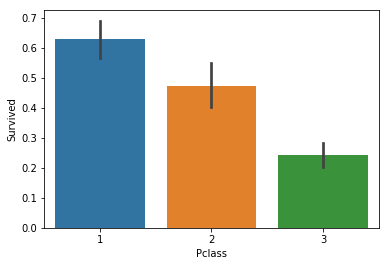

In [9]:
#Creating Seaborn Barchart 
sns.barplot(x='Pclass', y='Survived', data=train_data)

As the above diagram illustrates, the higher the Pclass, the larger the percentage of people who survived. 
<br>Let's now take a deeper look into this by comparing Pclass, Survived, and Age

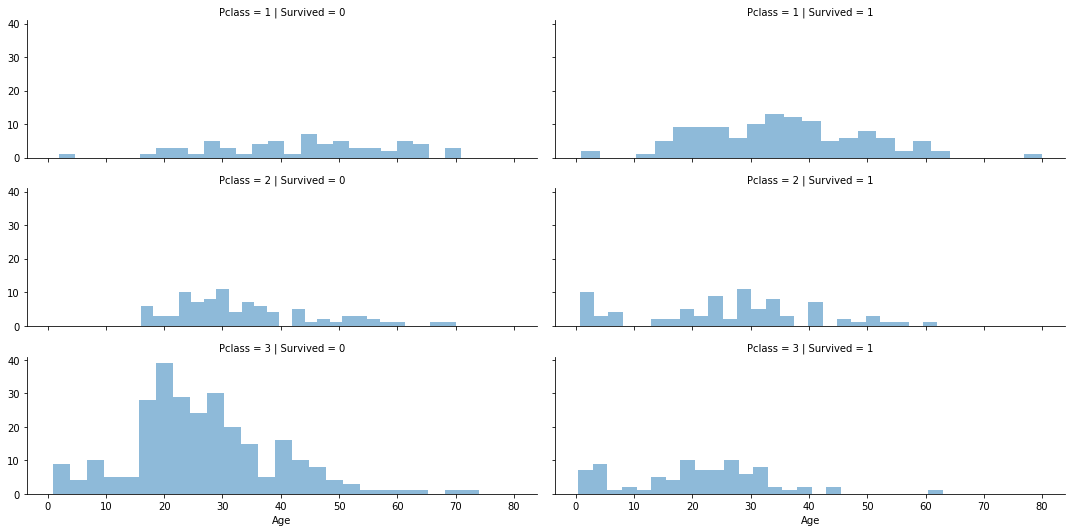

In [10]:
#First we use Facet Grid to create an empty 3 x 2 Graph to place out data on
grid = sns.FacetGrid(train_data, col='Survived', row = 'Pclass', height = 2.5, aspect = 3)

#We now can overlay a Histogram of Y(Age) = Survived
grid.map(plt.hist, 'Age', alpha = 0.5, bins = 25)

#Adding a Legend for Readability 
grid.add_legend()

<br>**Lastly let's Take a Look into how Siblings Affect Survival Percentage**

I would like to split this section up into two different plots:
    1. The Survival Ratio Based on How many Parents Someone Had With Them
    2. The Survival Ratio Based on How many Siblings Someone Had With Them
    
This should give us a good idea of the correlation between the two variables.

Text(0.5, 1.0, 'Violin Plot of Number of Siblins to Survival Ratio')

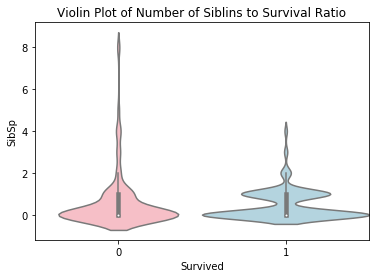

In [11]:
#Using a Violin Plot, as it is a cool way to visually see the data
SiblingPlot = sns.violinplot("Survived", "SibSp", data = train_data, palette = ["lightpink", "lightblue"], width = 1)

#Adding a Title for Readability 
SiblingPlot.set_title("Violin Plot of Number of Siblins to Survival Ratio")


Text(0.5, 1.0, 'Violin Plot of Number of Parents to Survival Ratio')

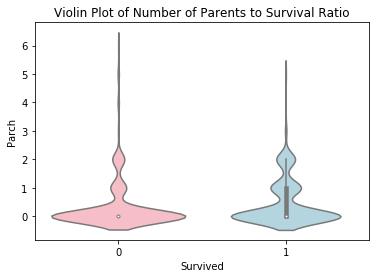

In [12]:
#Using a Violin Plot, as it is a cool way to visually see the data
ParentPlot = sns.violinplot("Survived", "Parch", data = train_data, palette = ["lightpink", "lightblue"])

#Adding a Title for Readability 
ParentPlot.set_title("Violin Plot of Number of Parents to Survival Ratio")


As this data shows us, the less siblings you have, the greater chance of survival. Interestingly enough though, it looks like not having any parents though does hurt your survival chances.

## <br>  **Data Preprocessing**

Now that we have explored the data, we need to preprocess it. This includes cleaning the data, dropping unused variables, and more. I will walk step by step on how to do this with the Titanic data.